In [1]:
import numpy as np
import pandas as pd
import scipy.linalg as la
import statistics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from scipy import stats


In [2]:
dataset = pd.DataFrame( pd.read_csv("Breast_cancer.csv"))

In [3]:

dataset

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,...,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
X = dataset.iloc[:, 2:32].values 
y = dataset.iloc[:, 1].values  

In [5]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# CHI SQUARE TEST + KENDALL CORRELATION

In [6]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(X)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)
mean = ex.mean(axis=0)
X= ex -mean #(to normalize it)
# X=ex

===Chi2 Stat===
26466.265203463237


===Degrees of Freedom===
16472


===P-Value===
0.0


===Contingency Table===
[[2.71340894e+01 3.70493550e+01 1.76643622e+02 ... 2.20122552e-01
  5.57144046e-01 1.61233544e-01]
 [2.84636769e+01 3.88647968e+01 1.85299270e+02 ... 2.30908696e-01
  5.84444456e-01 1.69134089e-01]
 [2.57737556e+01 3.51919317e+01 1.67787813e+02 ... 2.09086981e-01
  5.29212323e-01 1.53150301e-01]
 ...
 [1.80346900e+01 2.46248776e+01 1.17406297e+02 ... 1.46304596e-01
  3.70306149e-01 1.07163979e-01]
 [2.75760609e+01 3.76528306e+01 1.79520868e+02 ... 2.23708001e-01
  5.66219045e-01 1.63859784e-01]
 [4.96990662e+00 6.78599647e+00 3.23542202e+01 ... 4.03178640e-02
  1.02047054e-01 2.95316952e-02]]


In [7]:
corr = pd.DataFrame(X).corr(method='kendall')


In [8]:
eigenValues, eigenVectors = np.linalg.eig(corr)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [9]:
P = eigenVectors.T.dot(X.T)

In [10]:
print(P)

[[ 312.10273858  344.00666377  279.46104462 ...   93.75941118
   322.70800291 -219.73471454]
 [  54.37350737   59.93170375   48.68677935 ...   16.33445467
    56.22112146  -38.28145557]
 [-347.99666942 -383.5697623  -311.60095936 ... -104.54237911
  -359.82161104  245.0056964 ]
 ...
 [  39.96675619   44.05225831   35.78677805 ...   12.00649358
    41.32482827  -28.13843865]
 [-102.36962625 -112.83410636  -91.66315816 ...  -30.75306524
  -105.84815051   72.07293568]
 [  37.89426675   41.7679138    33.93104277 ...   11.38389286
    39.18191555  -26.67931055]]


In [11]:
dataset1 = P.T[:,:2]

In [12]:
dataset1

array([[ 312.10273858,   54.37350737],
       [ 344.00666377,   59.93170375],
       [ 279.46104462,   48.68677935],
       ...,
       [  93.75941118,   16.33445467],
       [ 322.70800291,   56.22112146],
       [-219.73471454,  -38.28145557]])

In [13]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(dataset1, y, test_size = 0.25, random_state = 0) 
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))
y_pred = reg.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

Variance score: 0.916083916083916
[[86  4]
 [ 8 45]]


/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# CHI SQUARE TEST + PEARSON CORRELATION

In [14]:
X = dataset.iloc[:, 2:32].values 
y = dataset.iloc[:, 1].values  

In [15]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(X)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)
mean = ex.mean(axis=0)
X= ex -mean

===Chi2 Stat===
26466.265203463237


===Degrees of Freedom===
16472


===P-Value===
0.0


===Contingency Table===
[[2.71340894e+01 3.70493550e+01 1.76643622e+02 ... 2.20122552e-01
  5.57144046e-01 1.61233544e-01]
 [2.84636769e+01 3.88647968e+01 1.85299270e+02 ... 2.30908696e-01
  5.84444456e-01 1.69134089e-01]
 [2.57737556e+01 3.51919317e+01 1.67787813e+02 ... 2.09086981e-01
  5.29212323e-01 1.53150301e-01]
 ...
 [1.80346900e+01 2.46248776e+01 1.17406297e+02 ... 1.46304596e-01
  3.70306149e-01 1.07163979e-01]
 [2.75760609e+01 3.76528306e+01 1.79520868e+02 ... 2.23708001e-01
  5.66219045e-01 1.63859784e-01]
 [4.96990662e+00 6.78599647e+00 3.23542202e+01 ... 4.03178640e-02
  1.02047054e-01 2.95316952e-02]]


In [16]:
corr = pd.DataFrame(X).corr(method='pearson')

In [17]:
eigenValues, eigenVectors = np.linalg.eig(corr)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [18]:
P = eigenVectors.T.dot(X.T)

In [19]:
dataset2 = P.T[:,:2]

In [20]:
dataset2 = dataset2.real

In [21]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(dataset2, y, test_size = 0.25, random_state = 0) 
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))
y_pred = reg.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

Variance score: 0.916083916083916
[[86  4]
 [ 8 45]]


/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# CHI SQUARE + SPEARMAN CORRELATION

In [22]:
X = dataset.iloc[:, 2:32].values 
y = dataset.iloc[:, 1].values  

In [23]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(X)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)
mean = ex.mean(axis=0)
X= ex -mean

===Chi2 Stat===
26466.265203463237


===Degrees of Freedom===
16472


===P-Value===
0.0


===Contingency Table===
[[2.71340894e+01 3.70493550e+01 1.76643622e+02 ... 2.20122552e-01
  5.57144046e-01 1.61233544e-01]
 [2.84636769e+01 3.88647968e+01 1.85299270e+02 ... 2.30908696e-01
  5.84444456e-01 1.69134089e-01]
 [2.57737556e+01 3.51919317e+01 1.67787813e+02 ... 2.09086981e-01
  5.29212323e-01 1.53150301e-01]
 ...
 [1.80346900e+01 2.46248776e+01 1.17406297e+02 ... 1.46304596e-01
  3.70306149e-01 1.07163979e-01]
 [2.75760609e+01 3.76528306e+01 1.79520868e+02 ... 2.23708001e-01
  5.66219045e-01 1.63859784e-01]
 [4.96990662e+00 6.78599647e+00 3.23542202e+01 ... 4.03178640e-02
  1.02047054e-01 2.95316952e-02]]


In [24]:
corr = pd.DataFrame(X).corr(method='spearman')

In [25]:
eigenValues, eigenVectors = np.linalg.eig(corr)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [26]:
P = eigenVectors.T.dot(X.T)

In [27]:
dataset3 = P.T[:,:2]

In [28]:
dataset3

array([[ 312.10273858,   53.14629781],
       [ 344.00666377,   58.57904575],
       [ 279.46104462,   47.5879192 ],
       ...,
       [  93.75941118,   15.96578618],
       [ 322.70800291,   54.95221127],
       [-219.73471454,  -37.41744347]])

In [29]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(dataset3, y, test_size = 0.25, random_state = 0) 
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))
y_pred = reg.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

Variance score: 0.916083916083916
[[86  4]
 [ 8 45]]


/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# ONLY PCA (using covariance)

In [30]:
X = dataset.iloc[:, 2:32].values 
y = dataset.iloc[:, 1].values  

In [31]:
mean = X.mean(axis=0)

In [32]:
X= X -mean

In [33]:
ret = np.cov(X.T)

In [34]:
eigenValues, eigenVectors = np.linalg.eig(ret)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [35]:
P = eigenVectors.T.dot(X.T)

In [36]:
dataset4 = P.T[:,:2]

In [37]:
dataset4

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

In [38]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(dataset4, y, test_size = 0.25, random_state = 0) 
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))
y_pred = reg.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))


Variance score: 0.9440559440559441
[[87  3]
 [ 5 48]]


/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# WITH PCA DIRECT FUNCTION

In [39]:
X = dataset.iloc[:, 2:32].values 
y = dataset.iloc[:, 1].values  

In [40]:
mean = X.mean(axis=0)
X= X -mean

In [41]:
pca = PCA(2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
print(pca.components_)
print(pca.explained_variance_)
B = pca.transform(X)

[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3.05051743e-05
  -1.57042845e-04 -5.53071662e-05]]
[4437

In [43]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(B, y, test_size = 0.25, random_state = 0) 
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))
y_pred = reg.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

Variance score: 0.9440559440559441
[[87  3]
 [ 5 48]]


/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# COVARIANCE AND CHI SQUARE TEST

In [44]:
X = dataset.iloc[:, 2:32].values 
y = dataset.iloc[:, 1].values 

In [45]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(X)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)
mean = ex.mean(axis=0)
X= ex -mean

===Chi2 Stat===
26466.265203463237


===Degrees of Freedom===
16472


===P-Value===
0.0


===Contingency Table===
[[2.71340894e+01 3.70493550e+01 1.76643622e+02 ... 2.20122552e-01
  5.57144046e-01 1.61233544e-01]
 [2.84636769e+01 3.88647968e+01 1.85299270e+02 ... 2.30908696e-01
  5.84444456e-01 1.69134089e-01]
 [2.57737556e+01 3.51919317e+01 1.67787813e+02 ... 2.09086981e-01
  5.29212323e-01 1.53150301e-01]
 ...
 [1.80346900e+01 2.46248776e+01 1.17406297e+02 ... 1.46304596e-01
  3.70306149e-01 1.07163979e-01]
 [2.75760609e+01 3.76528306e+01 1.79520868e+02 ... 2.23708001e-01
  5.66219045e-01 1.63859784e-01]
 [4.96990662e+00 6.78599647e+00 3.23542202e+01 ... 4.03178640e-02
  1.02047054e-01 2.95316952e-02]]


In [46]:
ret = np.cov(X.T)

In [47]:
eigenValues, eigenVectors = np.linalg.eig(ret)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [48]:
P = eigenVectors.T.dot(X.T)

In [49]:
dataset8 = P.T[:,:2]
print(dataset8)

[[-1.02001132e+03+0.j  1.43628982e-13+0.j]
 [-1.12427943e+03+0.j  2.23172640e-13+0.j]
 [-9.13332032e+02+0.j  2.69413718e-13+0.j]
 ...
 [-3.06423651e+02+0.j  1.33014333e-14+0.j]
 [-1.05467135e+03+0.j  5.13628694e-14+0.j]
 [ 7.18134986e+02+0.j -3.33577170e-13+0.j]]


In [50]:
dataset8 = dataset8.real

In [51]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(dataset8, y, test_size = 0.25, random_state = 0) 
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))
y_pred = reg.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

Variance score: 0.916083916083916
[[86  4]
 [ 8 45]]


/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# PCA WITH CORRELATION AS KENDALL (no chi square)

In [52]:
X = dataset.iloc[:, 2:32].values 
y = dataset.iloc[:, 1].values 

In [53]:
mean = X.mean(axis=0)
X= X -mean

In [54]:
corr = pd.DataFrame(X).corr(method='kendall')
#print(corr)

In [55]:
eigenValues, eigenVectors = np.linalg.eig(corr)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [56]:
P = eigenVectors.T.dot(X.T)

In [57]:
dataset5 = P.T[:,:2]
print(dataset5)

[[ 400.13949649  409.42453626]
 [ 438.5173402   470.68635914]
 [ 354.76797439  376.37052344]
 ...
 [ 116.94653915  124.41019967]
 [ 407.43842153  430.16585487]
 [-280.65466976 -302.42781283]]


In [58]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(dataset5, y, test_size = 0.25, random_state = 0) 
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))
y_pred = reg.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

Variance score: 0.9300699300699301
[[83  7]
 [ 3 50]]


/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# PCA WITH CORRELATION AS PEARSON (no chi square)

In [59]:
X = dataset.iloc[:, 2:32].values 
y = dataset.iloc[:, 1].values 

In [60]:
mean = X.mean(axis=0)
X= X -mean

In [61]:
corr = pd.DataFrame(X).corr(method='pearson')
#print(corr)

In [62]:
eigenValues, eigenVectors = np.linalg.eig(corr)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [63]:
P = eigenVectors.T.dot(X.T)

In [64]:
dataset6 = P.T[:,:2]
print(dataset6)

[[ 383.60866056 -371.40157776]
 [ 421.62029129 -418.58821576]
 [ 341.35578716 -336.93933293]
 ...
 [ 112.73085654 -111.15701026]
 [ 392.10917675 -384.88780784]
 [-270.23641711  268.47067306]]


In [65]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(dataset6, y, test_size = 0.25, random_state = 0) 
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))
y_pred = reg.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

Variance score: 0.9370629370629371
[[83  7]
 [ 2 51]]


/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# PCA WITH CORRELATION AS SPEARMAN (no chi square)

In [66]:
X = dataset.iloc[:, 2:32].values 
y = dataset.iloc[:, 1].values 

In [67]:
mean = X.mean(axis=0)
X= X -mean

In [68]:
corr = pd.DataFrame(X).corr(method='spearman')
#print(corr)

In [69]:
eigenValues, eigenVectors = np.linalg.eig(corr)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

In [70]:
P = eigenVectors.T.dot(X.T)

In [71]:
dataset7 = P.T[:,:2]
print(dataset7)

[[ 369.67298024  394.55669762]
 [ 403.12166842  451.83774546]
 [ 326.75442691  362.03173371]
 ...
 [ 107.80581088  119.89379707]
 [ 375.49341426  414.05060752]
 [-257.85407273 -290.13799769]]


In [72]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(dataset7, y, test_size = 0.25, random_state = 0) 
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))
y_pred = reg.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

Variance score: 0.9300699300699301
[[83  7]
 [ 3 50]]


/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# LDA

In [73]:
dataset = pd.DataFrame( pd.read_csv("Breast_cancer.csv"))
X = dataset.iloc[:, 2:32].values 
y = dataset.iloc[:, 1].values 

In [74]:
lda=LDA(n_components=2)
L=lda.fit_transform(X,y)

/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [75]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(L, y, test_size = 0.25, random_state = 0) 
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))
y_pred = reg.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

Variance score: 0.972027972027972
[[89  1]
 [ 3 50]]


/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# LDA WITH CHI SQUARE TEST

In [76]:
dataset = pd.DataFrame( pd.read_csv("Breast_cancer.csv"))
X = dataset.iloc[:, 2:32].values 
y = dataset.iloc[:, 1].values 

In [77]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(X)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)
mean = ex.mean(axis=0)
X= ex -mean

===Chi2 Stat===
26466.265203463237


===Degrees of Freedom===
16472


===P-Value===
0.0


===Contingency Table===
[[2.71340894e+01 3.70493550e+01 1.76643622e+02 ... 2.20122552e-01
  5.57144046e-01 1.61233544e-01]
 [2.84636769e+01 3.88647968e+01 1.85299270e+02 ... 2.30908696e-01
  5.84444456e-01 1.69134089e-01]
 [2.57737556e+01 3.51919317e+01 1.67787813e+02 ... 2.09086981e-01
  5.29212323e-01 1.53150301e-01]
 ...
 [1.80346900e+01 2.46248776e+01 1.17406297e+02 ... 1.46304596e-01
  3.70306149e-01 1.07163979e-01]
 [2.75760609e+01 3.76528306e+01 1.79520868e+02 ... 2.23708001e-01
  5.66219045e-01 1.63859784e-01]
 [4.96990662e+00 6.78599647e+00 3.23542202e+01 ... 4.03178640e-02
  1.02047054e-01 2.95316952e-02]]


In [78]:
lda=LDA(n_components=2)
L1=lda.fit_transform(X,y)

/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(30, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [79]:
from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(L1, y, test_size = 0.25, random_state = 0) 
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test)))
y_pred = reg.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))

Variance score: 0.916083916083916
[[86  4]
 [ 8 45]]


/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# NO PCA

In [80]:

from sklearn import datasets, linear_model, metrics 
from sklearn.model_selection import train_test_split 
X = dataset.iloc[:, 2:32].values 
y = dataset.iloc[:, 1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) 
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train) 
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 
y_pred = reg.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))


Variance score: 0.958041958041958
[[85  5]
 [ 1 52]]


/Users/nishthagoel/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# PLOT : BARGRAPH

In [81]:
import matplotlib.pyplot as plt 
import math

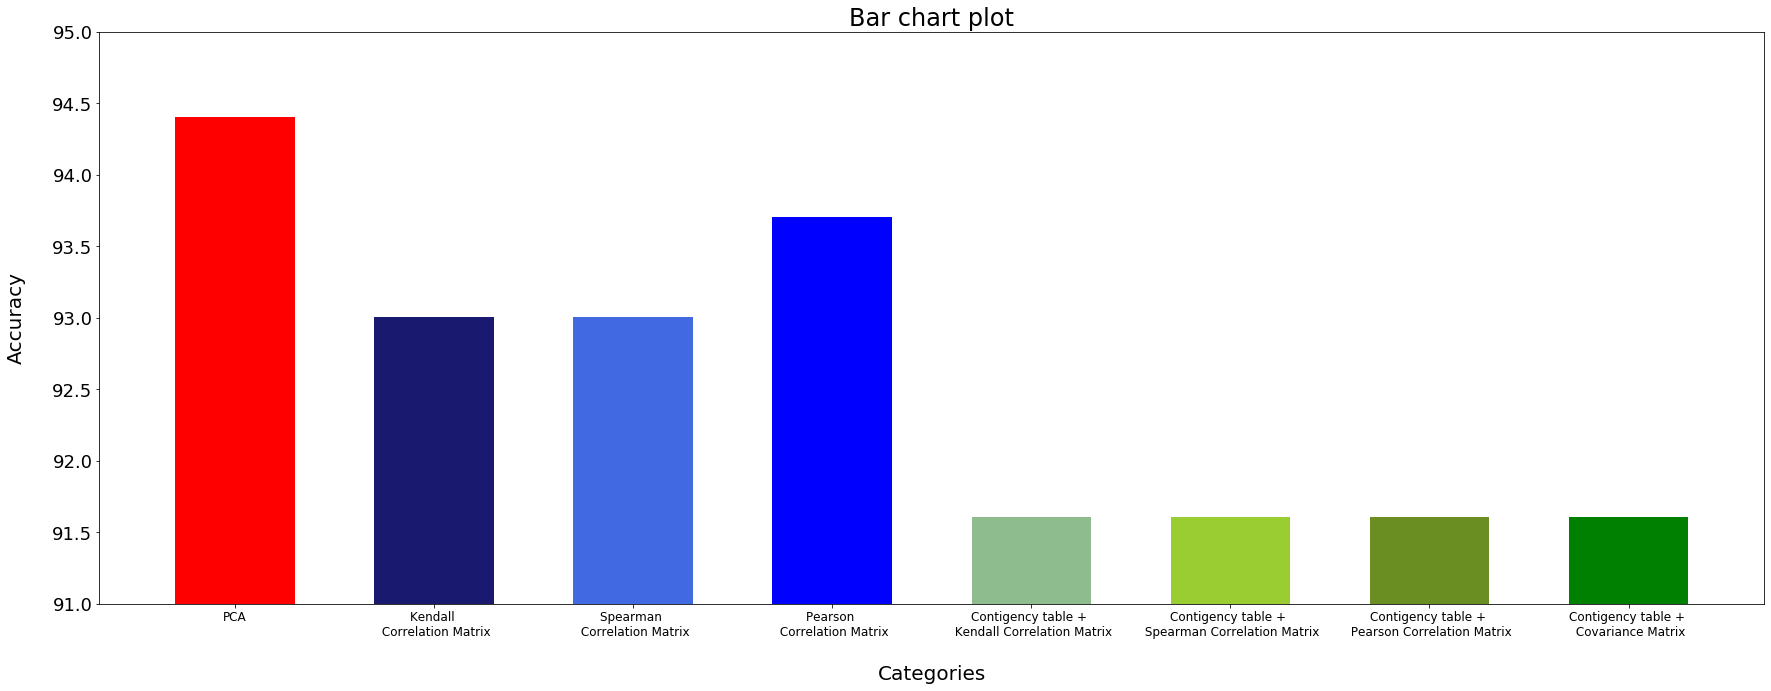

In [82]:
left = [ 1,2,3,4,5,6,7,8] 
plt.rcParams.update({'font.size': 20})
 
# heights of bars 
height = [94.40559440559441, 
          93.00699300699301, 
          93.00699300699301,
          93.70629370629371,
          91.6083916083916,
          91.6083916083916,
          91.6083916083916,
          91.6083916083916
] 
  
# labels for bars 
tick_label = ['PCA', 
              'Kendall \n Correlation Matrix', 
              'Spearman \n Correlation Matrix',
              'Pearson \n Correlation Matrix',
              'Contigency table + \n Kendall Correlation Matrix',
              'Contigency table + \n Spearman Correlation Matrix', 
              'Contigency table + \n Pearson Correlation Matrix',
              'Contigency table + \n Covariance Matrix'] 

low = min(height)
high = max(height)
plt.figure(figsize=(25,10))
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.2*(high-low))])
#plt.xlim(10, 10)
plt.yticks(fontsize=18)
#plt.subplots(figsize=(30,15))
plt.bar(left, height, tick_label = tick_label, 
        width = 0.6, color = ['red', 'midnightblue','royalblue','blue','darkseagreen','yellowgreen','olivedrab',
                              'green']) 

# naming the x-axis 
plt.xlabel('\nCategories') 
# naming the y-axis 
plt.ylabel('Accuracy\n') 
# plot title 
plt.title('Bar chart plot') 
plt.tick_params(axis='x', which='major', labelsize=12)

plt.tight_layout()

# function to show the plot 
plt.show() 
#plt.savefig("/Users/nishthagoel/Desktop/preprocessing/plot.png")